In [1]:
#load tools
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing as prep
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
#load file 1
confirmed_data = pd.read_csv("time_series_covid19_confirmed_global.csv")
confirmed_data

Province/State         Country/Region       Lat  \
0                                  NaN            Afghanistan  33.00000   
1                                  NaN                Albania  41.15330   
2                                  NaN                Algeria  28.03390   
3                                  NaN                Andorra  42.50630   
4                                  NaN                 Angola -11.20270   
..                                 ...                    ...       ...   
258  Falkland Islands (Islas Malvinas)         United Kingdom -51.79630   
259          Saint Pierre and Miquelon                 France  46.88520   
260                                NaN            South Sudan   6.87700   
261                                NaN         Western Sahara  24.21550   
262                                NaN  Sao Tome and Principe   0.18636   

          Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
0    65.000000        0        0        0        0        0        0  ...   
1    20.168300        0        0        0        0        0        0  ...   
2     1.659600        0        0        0        0        0        0  ...   
3     1.521800        0        0        0        0        0        0  ...   
4    17.873900        0        0        0        0        0        0  ...   
..         ...      ...      ...      ...      ...      ...      ...  ...   
258 -59.523600        0        0        0        0        0        0  ...   
259 -56.315900        0        0        0        0        0        0  ...   
260  31.307000        0        0        0        0        0        0  ...   
261 -12.885800        0        0        0        0        0        0  ...   
262   6.613081        0        0        0        0        0        0  ...   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  \
0        110      120      170      174     237     273     281     299   
1        197      212      223      243     259     277     304     333   
2        454      511      584      716     847     986    1171    1251   
3        308      334      370      376     390     428     439     466   
4          5        7        7        7       8       8       8      10   
..       ...      ...      ...      ...     ...     ...     ...     ...   
258        0        0        0        0       0       0       0       1   
259        0        0        0        0       0       0       0       0   
260        0        0        0        0       0       0       0       0   
261        0        0        0        0       0       0       0       0   
262        0        0        0        0       0       0       0       0   

     4/5/20  4/6/20  
0       349     367  
1       361     377  
2      1320    1423  
3       501     525  
4        14      16  
..      ...     ...  
258       2       2  
259       1       1  
260       1       1  
261       4       4  
262       0       4  

[263 rows x 80 columns]

In [3]:
#load file 2
deaths_data = pd.read_csv("time_series_covid19_deaths_global.csv")
deaths_data

Province/State         Country/Region       Lat  \
0                                  NaN            Afghanistan  33.00000   
1                                  NaN                Albania  41.15330   
2                                  NaN                Algeria  28.03390   
3                                  NaN                Andorra  42.50630   
4                                  NaN                 Angola -11.20270   
..                                 ...                    ...       ...   
258  Falkland Islands (Islas Malvinas)         United Kingdom -51.79630   
259          Saint Pierre and Miquelon                 France  46.88520   
260                                NaN            South Sudan   6.87700   
261                                NaN         Western Sahara  24.21550   
262                                NaN  Sao Tome and Principe   0.18636   

          Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
0    65.000000        0        0        0        0        0        0  ...   
1    20.168300        0        0        0        0        0        0  ...   
2     1.659600        0        0        0        0        0        0  ...   
3     1.521800        0        0        0        0        0        0  ...   
4    17.873900        0        0        0        0        0        0  ...   
..         ...      ...      ...      ...      ...      ...      ...  ...   
258 -59.523600        0        0        0        0        0        0  ...   
259 -56.315900        0        0        0        0        0        0  ...   
260  31.307000        0        0        0        0        0        0  ...   
261 -12.885800        0        0        0        0        0        0  ...   
262   6.613081        0        0        0        0        0        0  ...   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  \
0          4        4        4        4       4       6       6       7   
1         10       10       11       15      15      16      17      20   
2         29       31       35       44      58      86     105     130   
3          3        6        8       12      14      15      16      17   
4          0        2        2        2       2       2       2       2   
..       ...      ...      ...      ...     ...     ...     ...     ...   
258        0        0        0        0       0       0       0       0   
259        0        0        0        0       0       0       0       0   
260        0        0        0        0       0       0       0       0   
261        0        0        0        0       0       0       0       0   
262        0        0        0        0       0       0       0       0   

     4/5/20  4/6/20  
0         7      11  
1        20      21  
2       152     173  
3        18      21  
4         2       2  
..      ...     ...  
258       0       0  
259       0       0  
260       0       0  
261       0       0  
262       0       0  

[263 rows x 80 columns]

In [4]:
#load file 3
recovered_data = pd.read_csv("time_series_covid19_recovered_global.csv")
recovered_data 

Province/State         Country/Region       Lat  \
0                                  NaN            Afghanistan  33.00000   
1                                  NaN                Albania  41.15330   
2                                  NaN                Algeria  28.03390   
3                                  NaN                Andorra  42.50630   
4                                  NaN                 Angola -11.20270   
..                                 ...                    ...       ...   
244  Falkland Islands (Islas Malvinas)         United Kingdom -51.79630   
245          Saint Pierre and Miquelon                 France  46.88520   
246                                NaN            South Sudan   6.87700   
247                                NaN         Western Sahara  24.21550   
248                                NaN  Sao Tome and Principe   0.18636   

          Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
0    65.000000        0        0        0        0        0        0  ...   
1    20.168300        0        0        0        0        0        0  ...   
2     1.659600        0        0        0        0        0        0  ...   
3     1.521800        0        0        0        0        0        0  ...   
4    17.873900        0        0        0        0        0        0  ...   
..         ...      ...      ...      ...      ...      ...      ...  ...   
244 -59.523600        0        0        0        0        0        0  ...   
245 -56.315900        0        0        0        0        0        0  ...   
246  31.307000        0        0        0        0        0        0  ...   
247 -12.885800        0        0        0        0        0        0  ...   
248   6.613081        0        0        0        0        0        0  ...   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  \
0          2        2        2        5       5      10      10      10   
1         31       33       44       52      67      76      89      99   
2         31       31       37       46      61      61      62      90   
3          1        1       10       10      10      10      16      21   
4          0        0        0        1       1       1       1       2   
..       ...      ...      ...      ...     ...     ...     ...     ...   
244        0        0        0        0       0       0       0       0   
245        0        0        0        0       0       0       0       0   
246        0        0        0        0       0       0       0       0   
247        0        0        0        0       0       0       0       0   
248        0        0        0        0       0       0       0       0   

     4/5/20  4/6/20  
0        15      18  
1       104     116  
2        90      90  
3        26      31  
4         2       2  
..      ...     ...  
244       0       0  
245       0       0  
246       0       0  
247       0       0  
248       0       0  

[249 rows x 80 columns]

So all the data seems to be in order and identified by a common index among the three files, but I am only interested in the cumulative values for each location rather than individual values per date. I will add up the values for each file first.

Starting with confirmed cases:

In [5]:
#create a list so we can sum the relevant columns
column_list = list(confirmed_data)
column_list.remove("Province/State")
column_list.remove("Country/Region")
column_list.remove("Lat")
column_list.remove("Long")

In [6]:
#now we can sum and append to the end
confirmed_data["confirmed_sum"] = confirmed_data[column_list].sum(axis = 1)
confirmed_data

Province/State         Country/Region       Lat  \
0                                  NaN            Afghanistan  33.00000   
1                                  NaN                Albania  41.15330   
2                                  NaN                Algeria  28.03390   
3                                  NaN                Andorra  42.50630   
4                                  NaN                 Angola -11.20270   
..                                 ...                    ...       ...   
258  Falkland Islands (Islas Malvinas)         United Kingdom -51.79630   
259          Saint Pierre and Miquelon                 France  46.88520   
260                                NaN            South Sudan   6.87700   
261                                NaN         Western Sahara  24.21550   
262                                NaN  Sao Tome and Principe   0.18636   

          Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
0    65.000000        0        0        0        0        0        0  ...   
1    20.168300        0        0        0        0        0        0  ...   
2     1.659600        0        0        0        0        0        0  ...   
3     1.521800        0        0        0        0        0        0  ...   
4    17.873900        0        0        0        0        0        0  ...   
..         ...      ...      ...      ...      ...      ...      ...  ...   
258 -59.523600        0        0        0        0        0        0  ...   
259 -56.315900        0        0        0        0        0        0  ...   
260  31.307000        0        0        0        0        0        0  ...   
261 -12.885800        0        0        0        0        0        0  ...   
262   6.613081        0        0        0        0        0        0  ...   

     3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  \
0        120      170      174     237     273     281     299     349   
1        212      223      243     259     277     304     333     361   
2        511      584      716     847     986    1171    1251    1320   
3        334      370      376     390     428     439     466     501   
4          7        7        7       8       8       8      10      14   
..       ...      ...      ...     ...     ...     ...     ...     ...   
258        0        0        0       0       0       0       1       2   
259        0        0        0       0       0       0       0       1   
260        0        0        0       0       0       0       0       1   
261        0        0        0       0       0       0       0       4   
262        0        0        0       0       0       0       0       0   

     4/6/20  confirmed_sum  
0       367           3031  
1       377           4143  
2      1423          11826  
3       525           5536  
4        16            112  
..      ...            ...  
258       2              5  
259       1              2  
260       1              2  
261       4              8  
262       4              4  

[263 rows x 81 columns]

In [7]:
#let's drop the unnecessary columns
confirmed_data.drop(confirmed_data.iloc[:, 4:-1], axis = 'columns', inplace = True)
confirmed_data

Province/State         Country/Region       Lat  \
0                                  NaN            Afghanistan  33.00000   
1                                  NaN                Albania  41.15330   
2                                  NaN                Algeria  28.03390   
3                                  NaN                Andorra  42.50630   
4                                  NaN                 Angola -11.20270   
..                                 ...                    ...       ...   
258  Falkland Islands (Islas Malvinas)         United Kingdom -51.79630   
259          Saint Pierre and Miquelon                 France  46.88520   
260                                NaN            South Sudan   6.87700   
261                                NaN         Western Sahara  24.21550   
262                                NaN  Sao Tome and Principe   0.18636   

          Long  confirmed_sum  
0    65.000000           3031  
1    20.168300           4143  
2     1.659600          11826  
3     1.521800           5536  
4    17.873900            112  
..         ...            ...  
258 -59.523600              5  
259 -56.315900              2  
260  31.307000              2  
261 -12.885800              8  
262   6.613081              4  

[263 rows x 5 columns]

In [8]:
confirmed_data.isnull().sum()

Province/State    181
Country/Region      0
Lat                 0
Long                0
confirmed_sum       0
dtype: int64

Then we move onto deaths:

In [9]:
#create a list so we can sum the relevant columns
column_list2 = list(deaths_data)
column_list2.remove("Province/State")
column_list2.remove("Country/Region")
column_list2.remove("Lat")
column_list2.remove("Long")

In [10]:
#now we can sum and append to the end
deaths_data["deaths_sum"] = deaths_data[column_list2].sum(axis = 1)
deaths_data

Province/State         Country/Region       Lat  \
0                                  NaN            Afghanistan  33.00000   
1                                  NaN                Albania  41.15330   
2                                  NaN                Algeria  28.03390   
3                                  NaN                Andorra  42.50630   
4                                  NaN                 Angola -11.20270   
..                                 ...                    ...       ...   
258  Falkland Islands (Islas Malvinas)         United Kingdom -51.79630   
259          Saint Pierre and Miquelon                 France  46.88520   
260                                NaN            South Sudan   6.87700   
261                                NaN         Western Sahara  24.21550   
262                                NaN  Sao Tome and Principe   0.18636   

          Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
0    65.000000        0        0        0        0        0        0  ...   
1    20.168300        0        0        0        0        0        0  ...   
2     1.659600        0        0        0        0        0        0  ...   
3     1.521800        0        0        0        0        0        0  ...   
4    17.873900        0        0        0        0        0        0  ...   
..         ...      ...      ...      ...      ...      ...      ...  ...   
258 -59.523600        0        0        0        0        0        0  ...   
259 -56.315900        0        0        0        0        0        0  ...   
260  31.307000        0        0        0        0        0        0  ...   
261 -12.885800        0        0        0        0        0        0  ...   
262   6.613081        0        0        0        0        0        0  ...   

     3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  \
0          4        4        4       4       6       6       7       7   
1         10       11       15      15      16      17      20      20   
2         31       35       44      58      86     105     130     152   
3          6        8       12      14      15      16      17      18   
4          2        2        2       2       2       2       2       2   
..       ...      ...      ...     ...     ...     ...     ...     ...   
258        0        0        0       0       0       0       0       0   
259        0        0        0       0       0       0       0       0   
260        0        0        0       0       0       0       0       0   
261        0        0        0       0       0       0       0       0   
262        0        0        0       0       0       0       0       0   

     4/6/20  deaths_sum  
0        11          70  
1        21         200  
2       173        1028  
3        21         140  
4         2          18  
..      ...         ...  
258       0           0  
259       0           0  
260       0           0  
261       0           0  
262       0           0  

[263 rows x 81 columns]

In [11]:
#let's drop the unnecessary columns
deaths_data.drop(deaths_data.iloc[:, 4:-1], axis = 'columns', inplace = True)
deaths_data

Province/State         Country/Region       Lat  \
0                                  NaN            Afghanistan  33.00000   
1                                  NaN                Albania  41.15330   
2                                  NaN                Algeria  28.03390   
3                                  NaN                Andorra  42.50630   
4                                  NaN                 Angola -11.20270   
..                                 ...                    ...       ...   
258  Falkland Islands (Islas Malvinas)         United Kingdom -51.79630   
259          Saint Pierre and Miquelon                 France  46.88520   
260                                NaN            South Sudan   6.87700   
261                                NaN         Western Sahara  24.21550   
262                                NaN  Sao Tome and Principe   0.18636   

          Long  deaths_sum  
0    65.000000          70  
1    20.168300         200  
2     1.659600        1028  
3     1.521800         140  
4    17.873900          18  
..         ...         ...  
258 -59.523600           0  
259 -56.315900           0  
260  31.307000           0  
261 -12.885800           0  
262   6.613081           0  

[263 rows x 5 columns]

In [12]:
deaths_data.isnull().sum()

Province/State    181
Country/Region      0
Lat                 0
Long                0
deaths_sum          0
dtype: int64

Finally, recovered:

In [13]:
#create a list so we can sum the relevant columns
column_list3 = list(recovered_data)
column_list3.remove("Province/State")
column_list3.remove("Country/Region")
column_list3.remove("Lat")
column_list3.remove("Long")

In [14]:
#now we can sum and append to the end
recovered_data["recovered_sum"] = recovered_data[column_list3].sum(axis = 1)
recovered_data

Province/State         Country/Region       Lat  \
0                                  NaN            Afghanistan  33.00000   
1                                  NaN                Albania  41.15330   
2                                  NaN                Algeria  28.03390   
3                                  NaN                Andorra  42.50630   
4                                  NaN                 Angola -11.20270   
..                                 ...                    ...       ...   
244  Falkland Islands (Islas Malvinas)         United Kingdom -51.79630   
245          Saint Pierre and Miquelon                 France  46.88520   
246                                NaN            South Sudan   6.87700   
247                                NaN         Western Sahara  24.21550   
248                                NaN  Sao Tome and Principe   0.18636   

          Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
0    65.000000        0        0        0        0        0        0  ...   
1    20.168300        0        0        0        0        0        0  ...   
2     1.659600        0        0        0        0        0        0  ...   
3     1.521800        0        0        0        0        0        0  ...   
4    17.873900        0        0        0        0        0        0  ...   
..         ...      ...      ...      ...      ...      ...      ...  ...   
244 -59.523600        0        0        0        0        0        0  ...   
245 -56.315900        0        0        0        0        0        0  ...   
246  31.307000        0        0        0        0        0        0  ...   
247 -12.885800        0        0        0        0        0        0  ...   
248   6.613081        0        0        0        0        0        0  ...   

     3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  \
0          2        2        5       5      10      10      10      15   
1         33       44       52      67      76      89      99     104   
2         31       37       46      61      61      62      90      90   
3          1       10       10      10      10      16      21      26   
4          0        0        1       1       1       1       2       2   
..       ...      ...      ...     ...     ...     ...     ...     ...   
244        0        0        0       0       0       0       0       0   
245        0        0        0       0       0       0       0       0   
246        0        0        0       0       0       0       0       0   
247        0        0        0       0       0       0       0       0   
248        0        0        0       0       0       0       0       0   

     4/6/20  recovered_sum  
0        18             94  
1       116            792  
2        90           1048  
3        31            151  
4         2             10  
..      ...            ...  
244       0              0  
245       0              0  
246       0              0  
247       0              0  
248       0              0  

[249 rows x 81 columns]

In [15]:
#let's drop the unnecessary columns
recovered_data.drop(recovered_data.iloc[:, 4:-1], axis = 'columns', inplace = True)
recovered_data

Province/State         Country/Region       Lat  \
0                                  NaN            Afghanistan  33.00000   
1                                  NaN                Albania  41.15330   
2                                  NaN                Algeria  28.03390   
3                                  NaN                Andorra  42.50630   
4                                  NaN                 Angola -11.20270   
..                                 ...                    ...       ...   
244  Falkland Islands (Islas Malvinas)         United Kingdom -51.79630   
245          Saint Pierre and Miquelon                 France  46.88520   
246                                NaN            South Sudan   6.87700   
247                                NaN         Western Sahara  24.21550   
248                                NaN  Sao Tome and Principe   0.18636   

          Long  recovered_sum  
0    65.000000             94  
1    20.168300            792  
2     1.659600           1048  
3     1.521800            151  
4    17.873900             10  
..         ...            ...  
244 -59.523600              0  
245 -56.315900              0  
246  31.307000              0  
247 -12.885800              0  
248   6.613081              0  

[249 rows x 5 columns]

In [16]:
recovered_data.isnull().sum()

Province/State    182
Country/Region      0
Lat                 0
Long                0
recovered_sum       0
dtype: int64

Now let's merge the data files.

In [17]:
#join confirmed and deaths datasets
confirmed_deaths = pd.merge(confirmed_data, deaths_data, how= 'outer', left_on = ['Province/State', 'Country/Region', 'Lat', 'Long'], right_on = ['Province/State', 'Country/Region', 'Lat', 'Long'])
confirmed_deaths

Province/State         Country/Region       Lat  \
0                                  NaN            Afghanistan  33.00000   
1                                  NaN                Albania  41.15330   
2                                  NaN                Algeria  28.03390   
3                                  NaN                Andorra  42.50630   
4                                  NaN                 Angola -11.20270   
..                                 ...                    ...       ...   
258  Falkland Islands (Islas Malvinas)         United Kingdom -51.79630   
259          Saint Pierre and Miquelon                 France  46.88520   
260                                NaN            South Sudan   6.87700   
261                                NaN         Western Sahara  24.21550   
262                                NaN  Sao Tome and Principe   0.18636   

          Long  confirmed_sum  deaths_sum  
0    65.000000           3031          70  
1    20.168300           4143         200  
2     1.659600          11826        1028  
3     1.521800           5536         140  
4    17.873900            112          18  
..         ...            ...         ...  
258 -59.523600              5           0  
259 -56.315900              2           0  
260  31.307000              2           0  
261 -12.885800              8           0  
262   6.613081              4           0  

[263 rows x 6 columns]

In [18]:
#final merge
confirmed_deaths_recovered = pd.merge(confirmed_deaths, recovered_data, how= 'outer', left_on = ['Province/State', 'Country/Region', 'Lat', 'Long'], right_on = ['Province/State', 'Country/Region', 'Lat', 'Long'])
confirmed_deaths_recovered

Province/State         Country/Region       Lat        Long  \
0              NaN            Afghanistan  33.00000   65.000000   
1              NaN                Albania  41.15330   20.168300   
2              NaN                Algeria  28.03390    1.659600   
3              NaN                Andorra  42.50630    1.521800   
4              NaN                 Angola -11.20270   17.873900   
..             ...                    ...       ...         ...   
262            NaN  Sao Tome and Principe   0.18636    6.613081   
263            NaN                 Canada  56.13040 -106.346800   
264            NaN             Mozambique -18.66570   35.529600   
265            NaN                  Syria  34.80210   38.996800   
266            NaN            Timor-Leste  -8.87420  125.727500   

     confirmed_sum  deaths_sum  recovered_sum  
0           3031.0        70.0           94.0  
1           4143.0       200.0          792.0  
2          11826.0      1028.0         1048.0  
3           5536.0       140.0          151.0  
4            112.0        18.0           10.0  
..             ...         ...            ...  
262            4.0         0.0            0.0  
263            NaN         NaN        18030.0  
264            NaN         NaN            3.0  
265            NaN         NaN            6.0  
266            NaN         NaN            0.0  

[267 rows x 7 columns]

Now we clean the data.

In [19]:
#check for null values
confirmed_deaths_recovered.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
confirmed_sum       4
deaths_sum          4
recovered_sum      18
dtype: int64

In [20]:
#note that the 4 null values in confirmed_sum and deaths_sum are a result of the extra rows
#in recovered_sum, these values are unique to that file since they did not merge successfully
#we can take a look to see if they have a duplicate country that they can be added to
#through loc statements
#i already know that they have duplicates, so i'm commenting this out for now
#confirmed_deaths_recovered.loc[confirmed_deaths_recovered['Country/Region'] == 'Canada']
#confirmed_deaths_recovered.loc[confirmed_deaths_recovered['Country/Region'] == 'Mozambique']
#confirmed_deaths_recovered.loc[confirmed_deaths_recovered['Country/Region'] == 'Syria']
#confirmed_deaths_recovered.loc[confirmed_deaths_recovered['Country/Region'] == 'Timor-Leste']

In [21]:
bool_series = pd.isnull(confirmed_deaths_recovered["recovered_sum"])  
    
# filtering data  
# displaying data only with recovered_sum = NaN  
confirmed_deaths_recovered[bool_series] 

Province/State Country/Region        Lat        Long  \
35                     Alberta         Canada  53.933300 -116.576500   
36            British Columbia         Canada  49.282700 -123.120700   
37              Grand Princess         Canada  37.648900 -122.665500   
38                    Manitoba         Canada  53.760900  -98.813900   
39               New Brunswick         Canada  46.565300  -66.461900   
40   Newfoundland and Labrador         Canada  53.135500  -57.660400   
41                 Nova Scotia         Canada  44.682000  -63.744300   
42                     Ontario         Canada  51.253800  -85.323200   
43        Prince Edward Island         Canada  46.510700  -63.416800   
44                      Quebec         Canada  52.939900  -73.549100   
45                Saskatchewan         Canada  52.939900 -106.450900   
231           Diamond Princess         Canada   0.000000    0.000000   
234                        NaN     Mozambique -18.665695   35.529562   
235                        NaN          Syria  34.802075   38.996815   
236                        NaN    Timor-Leste  -8.874217  125.727539   
238                  Recovered         Canada   0.000000    0.000000   
245      Northwest Territories         Canada  64.825500 -124.845700   
246                      Yukon         Canada  64.282300 -135.000000   

     confirmed_sum  deaths_sum  recovered_sum  
35         11860.0       122.0            NaN  
36         16230.0       401.0            NaN  
37           262.0         0.0            NaN  
38          1664.0        15.0            NaN  
39          1028.0         0.0            NaN  
40          2054.0         8.0            NaN  
41          2295.0         0.0            NaN  
42         33222.0       688.0            NaN  
43           230.0         0.0            NaN  
44         59402.0       535.0            NaN  
45          2509.0        22.0            NaN  
231            0.0        16.0            NaN  
234          116.0         0.0            NaN  
235          148.0        17.0            NaN  
236           16.0         0.0            NaN  
238            0.0         0.0            NaN  
245           25.0         0.0            NaN  
246           58.0         0.0            NaN

In [22]:
#as long as we have one sum value, we can replace the null values with 0 
#so that they can be summed easily with their duplicates

In [23]:
confirmed_deaths_recovered["recovered_sum"].fillna(0, inplace = True)
confirmed_deaths_recovered["confirmed_sum"].fillna(0, inplace = True)
confirmed_deaths_recovered["deaths_sum"].fillna(0, inplace = True)

There are a significant amount of values missing in the Province/State column. Since there is no way to specify the values by taking the average or filling with the most common value, we can go ahead and drop that column. In addition, the latitudes and longitudes are no longer relevant as a result.

In [24]:
#drop columns
confirmed_deaths_recovered.drop('Province/State', axis = 'columns', inplace = True)
confirmed_deaths_recovered.drop('Lat', axis = 'columns', inplace = True)
confirmed_deaths_recovered.drop('Long', axis = 'columns', inplace = True)

When we look at the data, a lot of the Country/Region values are repeated since cases were reported in various regions of the same country. For the sake of this project, I am going to eliminate the duplicates by combining the values for each country together.

In [25]:
#select all duplicate rows based on one column
duplicates = confirmed_deaths_recovered[confirmed_deaths_recovered.duplicated(['Country/Region'])]
duplicates

Country/Region  confirmed_sum  deaths_sum  recovered_sum
9        Australia        30475.0       197.0          244.0
10       Australia          269.0         0.0            4.0
11       Australia        11636.0        31.0          442.0
12       Australia         5088.0         0.0          331.0
13       Australia         1028.0        13.0           98.0
..             ...            ...         ...            ...
259         France            2.0         0.0            0.0
263         Canada            0.0         0.0        18030.0
264     Mozambique            0.0         0.0            3.0
265          Syria            0.0         0.0            6.0
266    Timor-Leste            0.0         0.0            0.0

[83 rows x 4 columns]

In [26]:
#let's groupby and sum them up
confirmed_deaths_recovered['total_confirmed'] = confirmed_deaths_recovered.groupby(['Country/Region'])['confirmed_sum'].transform('sum')
confirmed_deaths_recovered['total_deaths'] = confirmed_deaths_recovered.groupby(['Country/Region'])['deaths_sum'].transform('sum')
confirmed_deaths_recovered['total_recovered'] = confirmed_deaths_recovered.groupby(['Country/Region'])['recovered_sum'].transform('sum')

confirmed_deaths_recovered

Country/Region  confirmed_sum  deaths_sum  recovered_sum  \
0              Afghanistan         3031.0        70.0           94.0   
1                  Albania         4143.0       200.0          792.0   
2                  Algeria        11826.0      1028.0         1048.0   
3                  Andorra         5536.0       140.0          151.0   
4                   Angola          112.0        18.0           10.0   
..                     ...            ...         ...            ...   
262  Sao Tome and Principe            4.0         0.0            0.0   
263                 Canada            0.0         0.0        18030.0   
264             Mozambique            0.0         0.0            3.0   
265                  Syria            0.0         0.0            6.0   
266            Timor-Leste            0.0         0.0            0.0   

     total_confirmed  total_deaths  total_recovered  
0             3031.0          70.0             94.0  
1             4143.0         200.0            792.0  
2            11826.0        1028.0           1048.0  
3             5536.0         140.0            151.0  
4              112.0          18.0             10.0  
..               ...           ...              ...  
262              4.0           0.0              0.0  
263         130839.0        1807.0          18030.0  
264            116.0           0.0              3.0  
265            148.0          17.0              6.0  
266             16.0           0.0              0.0  

[267 rows x 7 columns]

In [27]:
new_confirmed_deaths_recovered = confirmed_deaths_recovered.drop_duplicates(subset=['Country/Region'])
new_confirmed_deaths_recovered

Country/Region  confirmed_sum  deaths_sum  recovered_sum  \
0              Afghanistan         3031.0        70.0           94.0   
1                  Albania         4143.0       200.0          792.0   
2                  Algeria        11826.0      1028.0         1048.0   
3                  Andorra         5536.0       140.0          151.0   
4                   Angola          112.0        18.0           10.0   
..                     ...            ...         ...            ...   
255           Sierra Leone           23.0         0.0            0.0   
257                 Malawi           19.0         0.0            0.0   
260            South Sudan            2.0         0.0            0.0   
261         Western Sahara            8.0         0.0            0.0   
262  Sao Tome and Principe            4.0         0.0            0.0   

     total_confirmed  total_deaths  total_recovered  
0             3031.0          70.0             94.0  
1             4143.0         200.0            792.0  
2            11826.0        1028.0           1048.0  
3             5536.0         140.0            151.0  
4              112.0          18.0             10.0  
..               ...           ...              ...  
255             23.0           0.0              0.0  
257             19.0           0.0              0.0  
260              2.0           0.0              0.0  
261              8.0           0.0              0.0  
262              4.0           0.0              0.0  

[184 rows x 7 columns]

In [28]:
#we can reset the index and see what we are left with
new_confirmed_deaths_recovered.reset_index(drop=True, inplace=True)
new_confirmed_deaths_recovered

Country/Region  confirmed_sum  deaths_sum  recovered_sum  \
0              Afghanistan         3031.0        70.0           94.0   
1                  Albania         4143.0       200.0          792.0   
2                  Algeria        11826.0      1028.0         1048.0   
3                  Andorra         5536.0       140.0          151.0   
4                   Angola          112.0        18.0           10.0   
..                     ...            ...         ...            ...   
179           Sierra Leone           23.0         0.0            0.0   
180                 Malawi           19.0         0.0            0.0   
181            South Sudan            2.0         0.0            0.0   
182         Western Sahara            8.0         0.0            0.0   
183  Sao Tome and Principe            4.0         0.0            0.0   

     total_confirmed  total_deaths  total_recovered  
0             3031.0          70.0             94.0  
1             4143.0         200.0            792.0  
2            11826.0        1028.0           1048.0  
3             5536.0         140.0            151.0  
4              112.0          18.0             10.0  
..               ...           ...              ...  
179             23.0           0.0              0.0  
180             19.0           0.0              0.0  
181              2.0           0.0              0.0  
182              8.0           0.0              0.0  
183              4.0           0.0              0.0  

[184 rows x 7 columns]

In [29]:
#drop columns
new_confirmed_deaths_recovered.drop('confirmed_sum', axis = 'columns', inplace = True)
new_confirmed_deaths_recovered.drop('deaths_sum', axis = 'columns', inplace = True)
new_confirmed_deaths_recovered.drop('recovered_sum', axis = 'columns', inplace = True)
new_confirmed_deaths_recovered

/Users/dragon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country/Region  total_confirmed  total_deaths  total_recovered
0              Afghanistan           3031.0          70.0             94.0
1                  Albania           4143.0         200.0            792.0
2                  Algeria          11826.0        1028.0           1048.0
3                  Andorra           5536.0         140.0            151.0
4                   Angola            112.0          18.0             10.0
..                     ...              ...           ...              ...
179           Sierra Leone             23.0           0.0              0.0
180                 Malawi             19.0           0.0              0.0
181            South Sudan              2.0           0.0              0.0
182         Western Sahara              8.0           0.0              0.0
183  Sao Tome and Principe              4.0           0.0              0.0

[184 rows x 4 columns]

The data is now merged and cleaned. We can experiment with transforming the data now.

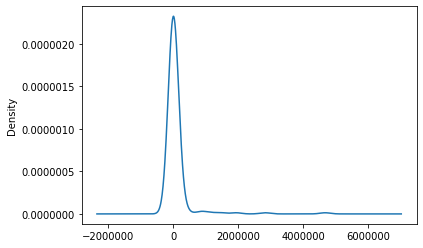

In [30]:
new_confirmed_deaths_recovered['total_confirmed'].plot.density()

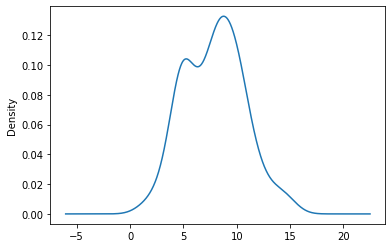

In [31]:
#try log to reach normal distribution
#get the log of the data
log_confirmed = (new_confirmed_deaths_recovered["total_confirmed"] + 1).apply(np.log) 

#plot density
log_confirmed.plot.density()

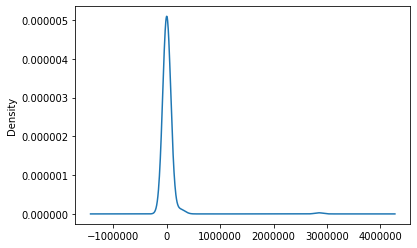

In [32]:
new_confirmed_deaths_recovered['total_recovered'].plot.density()

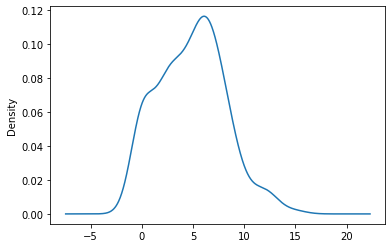

In [33]:
#try log to reach normal distribution
#get the log of the data
log_recovered = (new_confirmed_deaths_recovered["total_recovered"] + 1).apply(np.log) 

#plot density
log_recovered.plot.density()

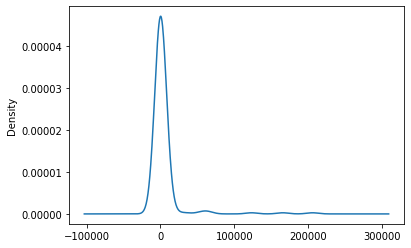

In [34]:
new_confirmed_deaths_recovered['total_deaths'].plot.density()

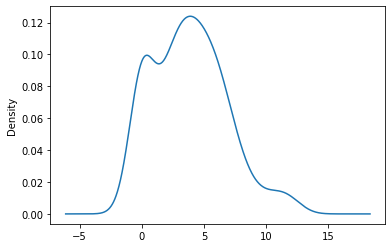

In [35]:
#try log to reach normal distribution
#get the log of the data
log_recovered = (new_confirmed_deaths_recovered["total_deaths"] + 1).apply(np.log) 

#plot density
log_recovered.plot.density()

We can begin our analysis now. The research question is: “How does the location of an individual affect their chance of recovering from the coronavirus?” 

Ideally, through analysis of the data, insight will be provided about which countries are handling the virus the most effectively. From this, other countries can observe their precautions and methods and hopefully provide better resources for their people.

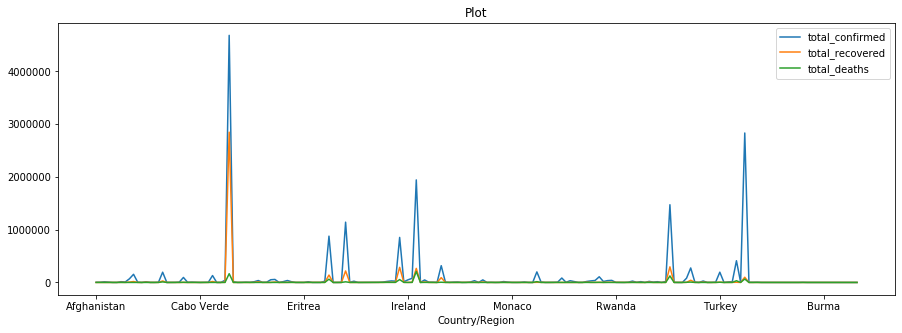

In [36]:
#let's try plotting all of them on the same graph
new_confirmed_deaths_recovered.plot(x='Country/Region', y=['total_confirmed', 'total_recovered', 'total_deaths'], figsize= (15, 5), title="Plot")

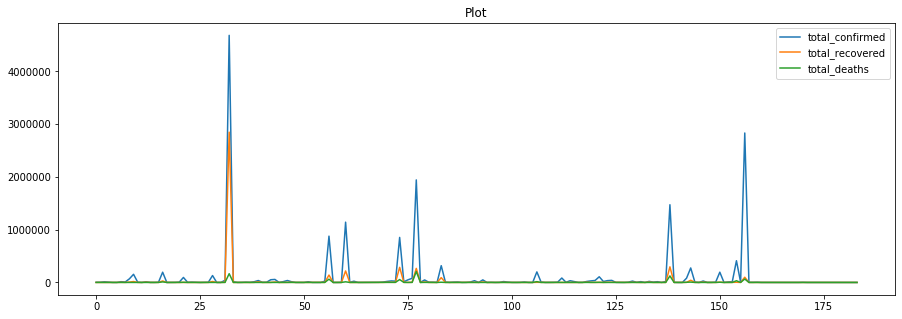

In [37]:
#we quickly realize that there are too many x values to be displayed on the axis, 
#so we can switch to using their index number so we can locate specific values
new_confirmed_deaths_recovered.plot(y=['total_confirmed', 'total_recovered', 'total_deaths'], figsize= (15, 5), title="Plot")

We can see that some countries really stand out in regards to confirmed cases and recovered. Let's try some other methods.

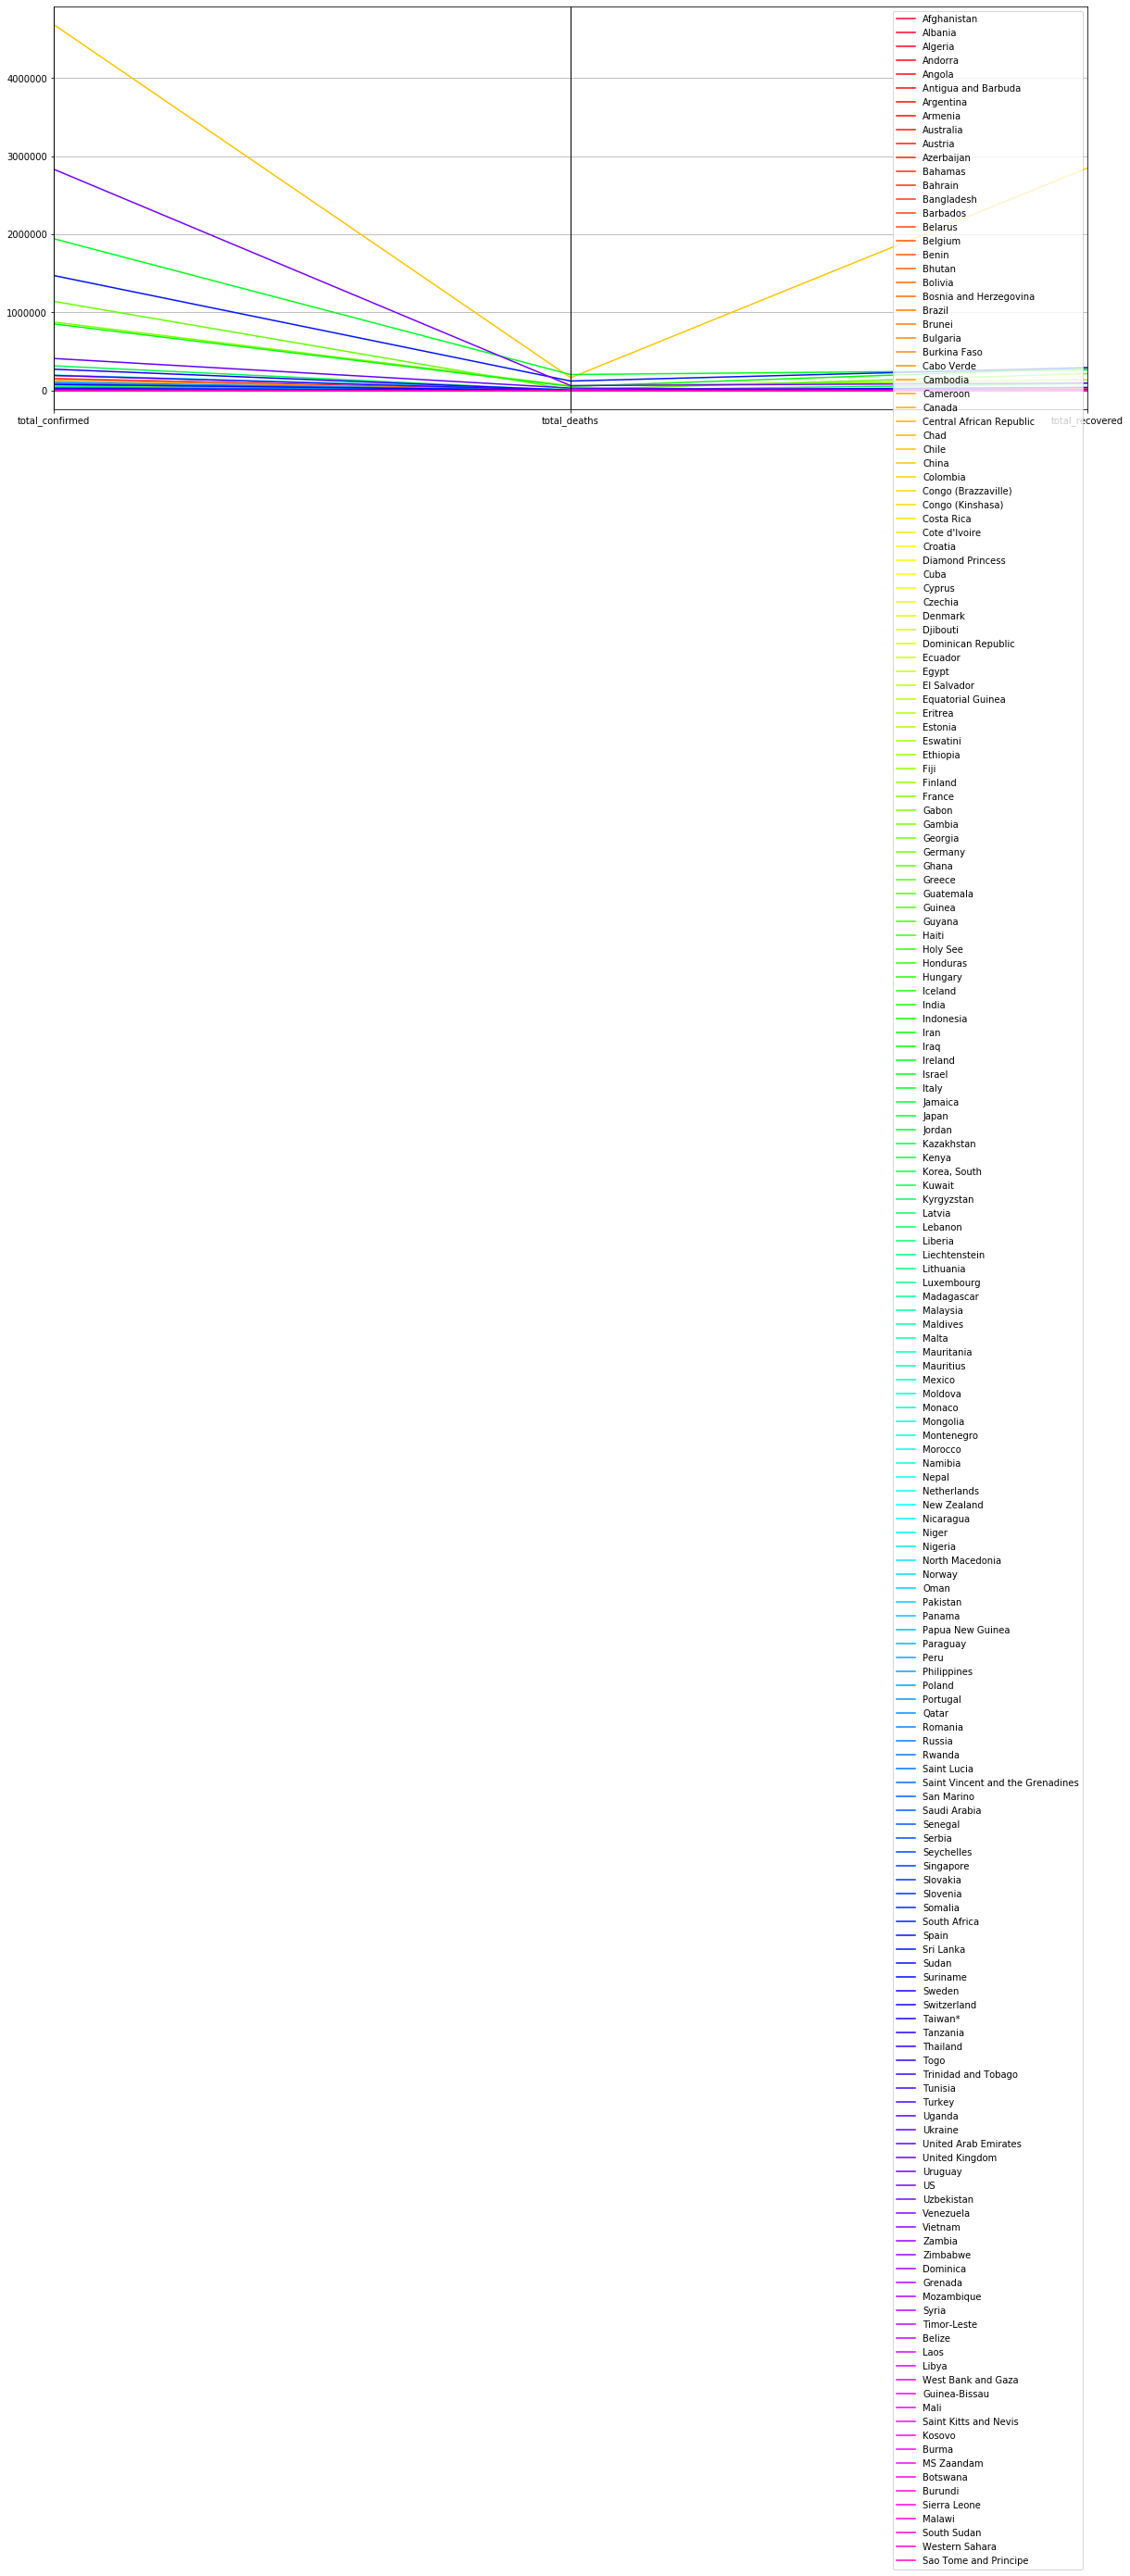

In [38]:
#let's try using parallel coordinates
from pandas.plotting import parallel_coordinates
from matplotlib.pyplot import figure
figure(figsize=(20, 8))
parallel_coordinates(new_confirmed_deaths_recovered, 'Country/Region', colormap='gist_rainbow')

This really shows the countries that have suffered the most, and is a good way of comparing all three totals at the same time. However, it is hard to locate countries of interest with a data set this big. Let's try one more visualization method.

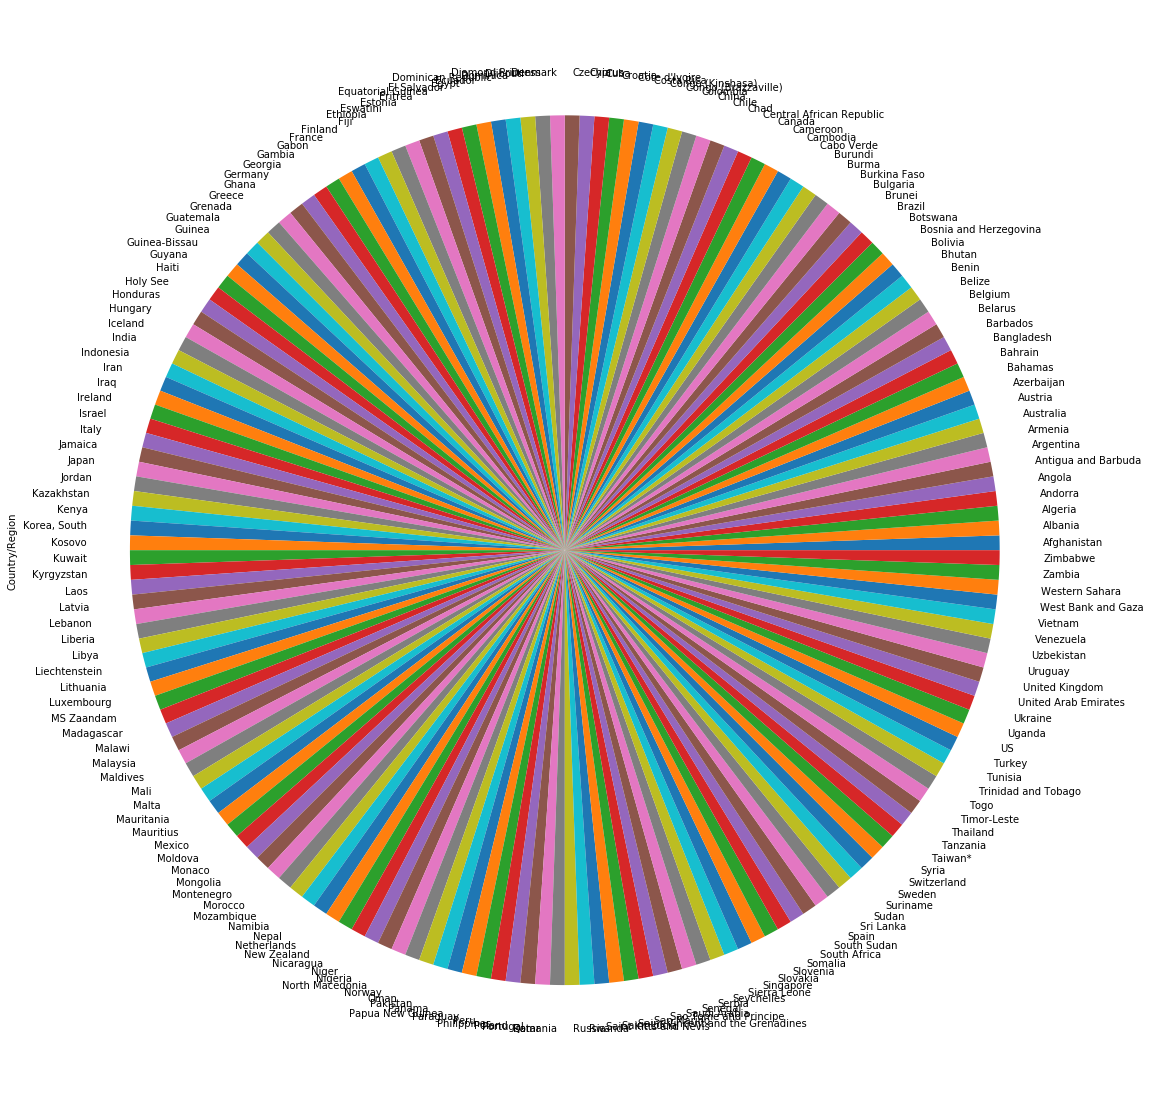

In [39]:
#this one was more as a "for fun" thing I did, it looks cool, but it's pretty useless
new_confirmed_deaths_recovered["Country/Region"].value_counts().sort_index().plot.pie(y='total_confirmed', subplots=False, figsize=(20, 20))

So at this point, we have a general sense of what the data set looks like. If we want to see which countries handle the virus the best, we can calculate the ratio of recovered cases to deaths, and we can try using the Naive Bayes Model to predict survivability in each area.

In [40]:
#let's create a copy of the dataframe and fill the nulls with zeroes, since the default is
#0/0 = NaN, we can jsut assume it's 0
recovered_deaths = new_confirmed_deaths_recovered.copy()
recovered_deaths['ratio'] = recovered_deaths['total_deaths']/recovered_deaths['total_recovered']
recovered_deaths = recovered_deaths.fillna(0)

In [41]:
#inf values result from dividing a number by 0, and we cannot substantially rely on them, so I
#choose to replace them with null and drop them
recovered_deaths = recovered_deaths.replace([np.inf, -np.inf], np.nan)

In [44]:
#drop the infs
recovered_deaths = recovered_deaths.dropna()
recovered_deaths.reset_index(drop=True, inplace=True)
recovered_deaths

Country/Region  total_confirmed  total_deaths  total_recovered  \
0              Afghanistan           3031.0          70.0             94.0   
1                  Albania           4143.0         200.0            792.0   
2                  Algeria          11826.0        1028.0           1048.0   
3                  Andorra           5536.0         140.0            151.0   
4                   Angola            112.0          18.0             10.0   
..                     ...              ...           ...              ...   
172           Sierra Leone             23.0           0.0              0.0   
173                 Malawi             19.0           0.0              0.0   
174            South Sudan              2.0           0.0              0.0   
175         Western Sahara              8.0           0.0              0.0   
176  Sao Tome and Principe              4.0           0.0              0.0   

        ratio  
0    0.744681  
1    0.252525  
2    0.980916  
3    0.927152  
4    1.800000  
..        ...  
172  0.000000  
173  0.000000  
174  0.000000  
175  0.000000  
176  0.000000  

[177 rows x 5 columns]

In [45]:
#query to find top countries 
sorted_data = recovered_deaths.sort_values('ratio', ascending=True)

sorted_data[['Country/Region', 'ratio']].iloc[::]

Country/Region      ratio
176  Sao Tome and Principe   0.000000
164                   Laos   0.000000
44                Djibouti   0.000000
163            Timor-Leste   0.000000
161             Mozambique   0.000000
..                     ...        ...
75                 Ireland   6.472727
19                 Bolivia   8.250000
130                 Serbia   8.473684
152         United Kingdom   9.747538
25              Cabo Verde  14.000000

[177 rows x 2 columns]

From this listing, we can see the countries where a patient with coronavirus has the highest chance of recovering. So if the ratio is zero, the infected are 100% likely to make a recovery. Let's take a look at the non-zero values.

In [46]:
#let's isolate the relevant data
ratio = recovered_deaths[recovered_deaths.ratio != 0]
ratio

Country/Region  total_confirmed  total_deaths  total_recovered  \
0           Afghanistan           3031.0          70.0             94.0   
1               Albania           4143.0         200.0            792.0   
2               Algeria          11826.0        1028.0           1048.0   
3               Andorra           5536.0         140.0            151.0   
4                Angola            112.0          18.0             10.0   
..                  ...              ...           ...              ...   
162               Syria            148.0          17.0              6.0   
165               Libya            120.0           5.0              2.0   
166  West Bank and Gaza           2552.0          12.0            335.0   
168                Mali            345.0          27.0             11.0   
170              Kosovo           1349.0          12.0            102.0   

        ratio  
0    0.744681  
1    0.252525  
2    0.980916  
3    0.927152  
4    1.800000  
..        ...  
162  2.833333  
165  2.500000  
166  0.035821  
168  2.454545  
170  0.117647  

[138 rows x 5 columns]

In [47]:
#query to find top countries 
sorted_data = ratio.sort_values('ratio', ascending=True)

sorted_data[['Country/Region', 'ratio']].iloc[::]

Country/Region      ratio
84           Kuwait   0.002549
107     New Zealand   0.008349
132       Singapore   0.008751
12          Bahrain   0.011942
112            Oman   0.014472
..              ...        ...
75          Ireland   6.472727
19          Bolivia   8.250000
130          Serbia   8.473684
152  United Kingdom   9.747538
25       Cabo Verde  14.000000

[138 rows x 2 columns]

Since the ratio was derived from taking deaths/recovered, the larger the ratio, the more likely the chance of death. However, the opposite is also true. The smaller the number of the ratio, the greater chance of recovery.

This method is flawed, however, since it only calculates recoverability and disregards other factors. For example, countries with very few cases could easily have a very high or low recoverability, and a number does not encompass the patients that are still ill or the resources a country has. As an alternative, I decided to give Naive Bayes a try.

In [58]:
#apply label encoder to columns
def label_encode(recovered_deaths, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(recovered_deaths[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(recovered_deaths[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        recovered_deaths[col] = col_values_transformed

In [59]:
#naive bayes
x = recovered_deaths[['total_confirmed','total_deaths']]
label_encode(x, x.columns.values)

y = recovered_deaths[['total_recovered']]
label_encode(y, y.columns.values)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 10)

/Users/dragon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [60]:
#apply model
nb = GaussianNB()
nb.fit(x_train, y_train.values.ravel())
y_pred = nb.predict(x_test)
y_pred

array([ 4,  4,  4,  4,  4,  4,  4,  4,  0,  4,  4, 30,  4,  4,  4, 30,  4,
        4,  4,  0,  4,  0,  4,  0,  0,  8, 10,  8,  4,  4,  4,  0,  8,  0,
        0,  0,  0,  4,  4,  4,  8,  4,  0,  4,  9,  4,  4,  4,  4,  4,  4,
        4,  4, 10,  0,  4,  4,  4,  8])

In [61]:
#accuracy (yikes!!)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.15254237288135594


In [64]:
#10 fold cross validation
scores = cross_val_score(nb, x, y.values.ravel(), cv=10)
print(scores)
print('Cross-validated score:', scores.mean())

/Users/dragon/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.17647059 0.11764706 0.11764706]
Cross-validated score: 0.11895424836601307


Alright, so Naive Bayes clearly can't help us here. From our two attempts to answer the question "which countries handle the virus the best," it seems that using the ratio is the more reliable method. 

We do need to keep in mind the drawbacks of this; it doesnt account for many factors, and to gain a more well-rounded view of different countries' different solutions to this virus, more resaerch must be done. However, this is a good starting point to see which countries are doing well, and use that to observe more trends.